<a href="https://colab.research.google.com/github/nomchanz/graduation_thesis_new/blob/main/backward_samesize_4000_0_8_seed0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
# 必要なライブラリのimport
import csv
import random
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential, Model, load_model
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Input, concatenate, BatchNormalization
from keras.optimizers import Adam
import sklearn
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

In [82]:
# データの準備、読み込み


## データファイルのpath
no_hole_path = 'no_hole_data.csv'
one_hole_size_path = 'one_hole_size_data.csv'
one_hole_position_path = 'one_hole_position_data.csv'
four_holes_size_path = 'four_holes_size_data.csv'
four_holes_position_path = 'four_holes_position_data.csv'
nine_holes_size_path = 'nine_holes_size_data.csv'
nine_holes_position_path = 'nine_holes_position_data.csv'
sixteen_holes_size_path = 'sixteen_holes_size_data.csv'
sixteen_holes_position_path = 'sixteen_holes_position_data.csv'
twentyfive_holes_size_path = 'twentyfive_holes_size_data.csv'
twentyfive_holes_position_path = 'twentyfive_holes_position_data.csv'

one_hole_position_raw_path = 'one_hole_position_data_raw.csv'
four_holes_position_raw_path = 'four_holes_position_data_raw.csv'
nine_holes_position_raw_path = 'nine_holes_position_data_raw.csv'
sixteen_holes_position_raw_path = 'sixteen_holes_position_data_raw.csv'
twentyfive_holes_position_raw_path = 'twentyfive_holes_position_data_raw.csv'


## csvファイルをリスト化

### 穴なしの温度分布データ
with open(no_hole_path) as f0:
  lst_f0 = list(csv.reader(f0))
lst_f0 = [r[:-1] for r in lst_f0]

### 大きさに関するデータ
with open(one_hole_size_path) as fs1:
  lst_fs1 = list(csv.reader(fs1))
with open(four_holes_size_path) as fs2:
  lst_fs2 = list(csv.reader(fs2))
with open(nine_holes_size_path) as fs3:
  lst_fs3 = list(csv.reader(fs3))
with open(sixteen_holes_size_path) as fs4:
  lst_fs4 = list(csv.reader(fs4))
with open(twentyfive_holes_size_path) as fs5:
  lst_fs5 = list(csv.reader(fs5))

### 位置に関するデータ
with open(one_hole_position_path) as fp1:
  lst_fp1 = list(csv.reader(fp1))
with open(four_holes_position_path) as fp2:
  lst_fp2 = list(csv.reader(fp2))
with open(nine_holes_position_path) as fp3:
  lst_fp3 = list(csv.reader(fp3))
with open(sixteen_holes_position_path) as fp4:
  lst_fp4 = list(csv.reader(fp4))
with open(twentyfive_holes_position_path) as fp5:
  lst_fp5 = list(csv.reader(fp5))

### raw位置に関するデータ
with open(one_hole_position_raw_path) as fp1_raw:
  lst_fp1_raw = list(csv.reader(fp1_raw))
with open(four_holes_position_raw_path) as fp2_raw:
  lst_fp2_raw = list(csv.reader(fp2_raw))
with open(nine_holes_position_raw_path) as fp3_raw:
  lst_fp3_raw = list(csv.reader(fp3_raw))
with open(sixteen_holes_position_raw_path) as fp4_raw:
  lst_fp4_raw = list(csv.reader(fp4_raw))
with open(twentyfive_holes_position_raw_path) as fp5_raw:
  lst_fp5_raw = list(csv.reader(fp5_raw))

In [111]:
# model_1

# データの前処理


## 変数設定(各条件を変えてたくさん試すため)
n = 4000                    #nは総抽出データ数
train = 0.8                 #train:validのtrainデータの割合
seed = 0                       
random.seed(seed)           #乱数seed固定


## データ加工

### データ抽出(各データをランダムにシャッフル→train,valid,testに分割。各大きさのデータが同じ数だけ抽出される。)
for i in range (1,6):
  exec("dummy_lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("dummy_lst_fs"+str(i)+"_train = dummy_lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("dummy_lst_fs"+str(i)+"_valid = dummy_lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("dummy_lst_fs"+str(i)+"_test_samesize = dummy_lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":"+str(int(n*2/5))+"]")  #拡張前と同数の拡張用データセットを作成                  
  exec("dummy_lst_fs"+str(i)+"_test = dummy_lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  
  exec("lst_fp"+str(i)+"_shuffle = random.sample(lst_fp"+str(i)+", len(lst_fp"+str(i)+"))")
  exec("lst_fp"+str(i)+"_train = lst_fp"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_valid = lst_fp"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_test_samesize = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":"+str(int(n*2/5))+"]")  #拡張前と同数の拡張用データセットを作成         
  exec("lst_fp"+str(i)+"_test = lst_fp"+str(i)+"_shuffle["+str(int(n/5))+":-1]")

random.seed(seed)

for i in range(1,6):
  exec("lst_fs"+str(i)+"_shuffle = random.sample(lst_fs"+str(i)+", len(lst_fs"+str(i)+"))")  
  exec("lst_fs"+str(i)+"_train = lst_fs"+str(i)+"_shuffle[0:"+str(int(n/5*train))+"]")       
  exec("lst_fs"+str(i)+"_valid = lst_fs"+str(i)+"_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fs"+str(i)+"_test_samesize = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":"+str(int(n*2/5))+"]")  #拡張前と同数の拡張用データセットを作成         
  exec("lst_fs"+str(i)+"_test = lst_fs"+str(i)+"_shuffle["+str(int(n/5))+":-1]")
  
  exec("lst_fp"+str(i)+"_raw_shuffle = random.sample(lst_fp"+str(i)+"_raw, len(lst_fp"+str(i)+"_raw))")
  exec("lst_fp"+str(i)+"_raw_train = lst_fp"+str(i)+"_raw_shuffle[0:"+str(int(n/5*train))+"]")
  exec("lst_fp"+str(i)+"_raw_valid = lst_fp"+str(i)+"_raw_shuffle["+str(int(n/5*train))+":"+str(int(n/5))+"]") 
  exec("lst_fp"+str(i)+"_raw_test_samesize = lst_fp"+str(i)+"_raw_shuffle["+str(int(n/5))+":"+str(int(n*2/5))+"]")  #拡張前と同数の拡張用データセットを作成         
  exec("lst_fp"+str(i)+"_raw_test = lst_fp"+str(i)+"_raw_shuffle["+str(int(n/5))+":-1]")

### train,valid,testの各々について、大きさ、位置、表面温度分布データに分割
for i in range (1,6):
  exec("lst_x_fs"+str(i)+"_train = [r[0] for r in lst_fs"+str(i)+"_train]")
  exec("lst_x_fp"+str(i)+"_train = [r[0] for r in lst_fp"+str(i)+"_train]")
  exec("lst_y"+str(i)+"_train = [r[1:-1] for r in lst_fp"+str(i)+"_train]")
  exec("lst_x_fs"+str(i)+"_valid = [r[0] for r in lst_fs"+str(i)+"_valid]")
  exec("lst_x_fp"+str(i)+"_valid = [r[0] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_y"+str(i)+"_valid = [r[1:-1] for r in lst_fp"+str(i)+"_valid]")
  exec("lst_x_fs"+str(i)+"_test = [r[0] for r in lst_fs"+str(i)+"_test]")
  exec("lst_x_fp"+str(i)+"_test = [r[0] for r in lst_fp"+str(i)+"_test]")
  exec("lst_y"+str(i)+"_test = [r[1:-1] for r in lst_fp"+str(i)+"_test]")
  exec("lst_x_fs"+str(i)+"_test_samesize = [r[0] for r in lst_fs"+str(i)+"_test_samesize]")
  exec("lst_x_fp"+str(i)+"_test_samesize = [r[0] for r in lst_fp"+str(i)+"_test_samesize]")
  exec("lst_y"+str(i)+"_test_samesize = [r[1:-1] for r in lst_fp"+str(i)+"_test_samesize]")

  exec("lst_x_fp"+str(i)+"_raw_train = [r[0:2] for r in lst_fp"+str(i)+"_raw_train]")
  exec("lst_x_fp"+str(i)+"_raw_valid = [r[0:2] for r in lst_fp"+str(i)+"_raw_valid]")
  exec("lst_x_fp"+str(i)+"_raw_test = [r[0:2] for r in lst_fp"+str(i)+"_raw_test]")
  exec("lst_x_fp"+str(i)+"_raw_test_samesize = [r[0:2] for r in lst_fp"+str(i)+"_raw_test_samesize]")


### データを結合(入力データ・正解データの大枠完成)
lst_x_fs_train = lst_x_fs1_train + lst_x_fs2_train + lst_x_fs3_train + lst_x_fs4_train + lst_x_fs5_train
lst_x_fp_train = lst_x_fp1_train + lst_x_fp2_train + lst_x_fp3_train + lst_x_fp4_train + lst_x_fp5_train
lst_y_train = lst_y1_train + lst_y2_train + lst_y3_train + lst_y4_train + lst_y5_train

lst_x_fs_valid = lst_x_fs1_valid + lst_x_fs2_valid + lst_x_fs3_valid + lst_x_fs4_valid + lst_x_fs5_valid
lst_x_fp_valid = lst_x_fp1_valid + lst_x_fp2_valid + lst_x_fp3_valid + lst_x_fp4_valid + lst_x_fp5_valid
lst_y_valid = lst_y1_valid + lst_y2_valid + lst_y3_valid + lst_y4_valid + lst_y5_valid

lst_x_fs_test = lst_x_fs1_test + lst_x_fs2_test + lst_x_fs3_test + lst_x_fs4_test + lst_x_fs5_test
lst_x_fp_test = lst_x_fp1_test + lst_x_fp2_test + lst_x_fp3_test + lst_x_fp4_test + lst_x_fp5_test
lst_y_test = lst_y1_test + lst_y2_test + lst_y3_test + lst_y4_test + lst_y5_test
lst_x_fs_test_samesize = lst_x_fs1_test_samesize + lst_x_fs2_test_samesize + lst_x_fs3_test_samesize + lst_x_fs4_test_samesize + lst_x_fs5_test_samesize
lst_x_fp_test_samesize = lst_x_fp1_test_samesize + lst_x_fp2_test_samesize + lst_x_fp3_test_samesize + lst_x_fp4_test_samesize + lst_x_fp5_test_samesize
lst_y_test_samesize = lst_y1_test_samesize + lst_y2_test_samesize + lst_y3_test_samesize + lst_y4_test_samesize + lst_y5_test_samesize

lst_x_fp_raw_train = lst_x_fp1_raw_train + lst_x_fp2_raw_train + lst_x_fp3_raw_train + lst_x_fp4_raw_train + lst_x_fp5_raw_train
lst_x_fp_raw_valid = lst_x_fp1_raw_valid + lst_x_fp2_raw_valid + lst_x_fp3_raw_valid + lst_x_fp4_raw_valid + lst_x_fp5_raw_valid
lst_x_fp_raw_test = lst_x_fp1_raw_test + lst_x_fp2_raw_test + lst_x_fp3_raw_test + lst_x_fp4_raw_test + lst_x_fp5_raw_test
lst_x_fp_raw_test_samesize = lst_x_fp1_raw_test_samesize + lst_x_fp2_raw_test_samesize + lst_x_fp3_raw_test_samesize + lst_x_fp4_raw_test_samesize + lst_x_fp5_raw_test_samesize


### np.arrayで変換
lst_f0 = np.array(lst_f0, dtype=float)
lst_x_fs_train = np.array(lst_x_fs_train, dtype=int)
lst_x_fp_train = np.array(lst_x_fp_train, dtype=int)
lst_x_fs_valid = np.array(lst_x_fs_valid, dtype=int)
lst_x_fp_valid = np.array(lst_x_fp_valid, dtype=int)
lst_x_fs_test = np.array(lst_x_fs_test, dtype=int)
lst_x_fp_test = np.array(lst_x_fp_test, dtype=int)
lst_y_train = np.array(lst_y_train, dtype=float)
lst_y_valid = np.array(lst_y_valid, dtype=float)
lst_y_test = np.array(lst_y_test, dtype=float)

lst_x_fp_raw_train = np.array(lst_x_fp_raw_train, dtype=int)
lst_x_fp_raw_valid = np.array(lst_x_fp_raw_valid, dtype=int)
lst_x_fp_raw_test = np.array(lst_x_fp_raw_test, dtype=int)

lst_x_fs_test_samesize = np.array(lst_x_fs_test_samesize, dtype=int)
lst_x_fp_test_samesize = np.array(lst_x_fp_test_samesize, dtype=int)
lst_y_test_samesize = np.array(lst_y_test_samesize, dtype=float)
lst_x_fp_raw_test_samesize = np.array(lst_x_fp_raw_test_samesize, dtype=int)

### 大きさデータを二次元化
x_fs_train = lst_x_fs_train.reshape(-1, 1)
x_fs_valid = lst_x_fs_valid.reshape(-1, 1)
x_fs_test = lst_x_fs_test.reshape(-1, 1)
x_fs_test_samesize = lst_x_fs_test_samesize.reshape(-1, 1)
x_fp_train = lst_x_fp_train.reshape(-1, 1)
x_fp_valid = lst_x_fp_valid.reshape(-1, 1)
x_fp_test = lst_x_fp_test.reshape(-1, 1)
x_fp_test_samesize = lst_x_fp_test_samesize.reshape(-1, 1)

### 温度分布データを、穴なし温度分布データとの差に変換
y_train = lst_y_train - lst_f0
y_valid = lst_y_valid - lst_f0
y_test = lst_y_test - lst_f0
y_test_samesize = lst_y_test_samesize - lst_f0

### 入力データの正規化
scaler_x = MinMaxScaler()
x_fs_train_n = scaler_x.fit_transform(x_fs_train)
x_fs_valid_n = scaler_x.fit_transform(x_fs_valid)
x_fs_test_n = scaler_x.fit_transform(x_fs_test) 
x_fs_test_samesize_n = scaler_x.fit_transform(x_fs_test_samesize) 
x_fp_train_n = scaler_x.fit_transform(x_fp_train)
x_fp_valid_n = scaler_x.fit_transform(x_fp_valid)
x_fp_test_n = scaler_x.fit_transform(x_fp_test) 
x_fp_test_samesize_n = scaler_x.fit_transform(x_fp_test_samesize) 

x_fp_raw_train_n = scaler_x.fit_transform(lst_x_fp_raw_train)
x_fp_raw_valid_n = scaler_x.fit_transform(lst_x_fp_raw_valid)
x_fp_raw_test_n = scaler_x.fit_transform(lst_x_fp_raw_test)
x_fp_raw_test_samesize_n = scaler_x.fit_transform(lst_x_fp_raw_test_samesize)

In [112]:
# データ拡張
# 余りの全データ使用
## 作成済モデルでデータ生成

model = load_model(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")
y_expand_data = model.predict([x_fs_test_n, x_fp_raw_test_n])
y_expand_data

array([[ 0.01527478,  0.01533422,  0.01524035, ...,  0.02747557,
         0.02715073,  0.02696622],
       [ 0.02522091,  0.02541189,  0.02516101, ...,  0.02198948,
         0.02174661,  0.02155577],
       [ 0.03494197,  0.03520954,  0.03516889, ...,  0.01059473,
         0.0103709 ,  0.01038244],
       ...,
       [-0.4890447 , -0.48420814, -0.45480868, ..., -0.03096453,
        -0.02585133, -0.02131685],
       [ 0.04957027,  0.04816312,  0.04529262, ..., -0.89635825,
        -0.9709209 , -0.9962615 ],
       [ 1.7001785 ,  1.6985929 ,  1.6893413 , ...,  0.1618037 ,
         0.15663654,  0.15487629]], dtype=float32)

In [113]:
# データ拡張
# 余ったデータ全てではなく、拡張用も一部のみを利用
## 作成済モデルでデータ生成

model = load_model(str(n)+"_random.seed("+str(seed)+")_train"+str(train)+"_raw.h5")
y_expand_samesize_data = model.predict([x_fs_test_samesize_n, x_fp_raw_test_samesize_n])
y_expand_samesize_data

array([[0.01527478, 0.01533422, 0.01524035, ..., 0.02747557, 0.02715073,
        0.02696622],
       [0.02522091, 0.02541189, 0.02516101, ..., 0.02198948, 0.02174661,
        0.02155577],
       [0.03494197, 0.03520954, 0.03516889, ..., 0.01059473, 0.0103709 ,
        0.01038244],
       ...,
       [0.36106429, 0.3611802 , 0.36070892, ..., 0.91652626, 0.9208676 ,
        0.92175734],
       [0.3919468 , 0.3925446 , 0.39196935, ..., 0.7935772 , 0.79648954,
        0.7968781 ],
       [0.48162776, 0.4818397 , 0.48151967, ..., 0.79551864, 0.7978885 ,
        0.7984724 ]], dtype=float32)

In [134]:
## データセット作成

### 拡張前セット
X_not_expanded_data = np.concatenate([y_train, y_valid])
size_Y_not_expanded_data = np.concatenate([x_fs_train, x_fs_valid])
position_Y_not_expanded_data = np.concatenate([x_fp_train, x_fp_valid])

### 拡張前セット(nが2倍)
X_ne_ss_data = np.concatenate([y_train, y_valid, y_test_samesize])
size_Y_ne_ss_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test_samesize])
position_Y_ne_ss_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test_samesize])

### 拡張後セット(全データ使用)
X_data = np.concatenate([y_train, y_valid, y_expand_data])
size_Y_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test])
position_Y_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test])

### 拡張後セット(一部データ使用)
X_samesize_data = np.concatenate([y_train, y_valid, y_expand_samesize_data])
size_Y_samesize_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test_samesize])
position_Y_samesize_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test_samesize])

### 正解データセット
X_ans_data = np.concatenate([y_train, y_valid, y_test])
size_Y_ans_data = np.concatenate([x_fs_train, x_fs_valid, x_fs_test])
position_Y_ans_data = np.concatenate([x_fp_train, x_fp_valid, x_fp_test])

In [135]:
## データ加工
size_Y_data = keras.utils.to_categorical(size_Y_data, 6)
position_Y_data = keras.utils.to_categorical(position_Y_data, 26)

size_Y_samesize_data = keras.utils.to_categorical(size_Y_samesize_data, 6)
position_Y_samesize_data = keras.utils.to_categorical(position_Y_samesize_data, 26)

size_Y_not_expanded_data = keras.utils.to_categorical(size_Y_not_expanded_data, 6)
position_Y_not_expanded_data = keras.utils.to_categorical(position_Y_not_expanded_data, 26)

size_Y_ne_ss_data = keras.utils.to_categorical(size_Y_ne_ss_data, 6)
position_Y_ne_ss_data = keras.utils.to_categorical(position_Y_ne_ss_data, 26)

size_Y_ans_data = keras.utils.to_categorical(size_Y_ans_data, 6)
position_Y_ans_data = keras.utils.to_categorical(position_Y_ans_data, 26)

In [136]:
### train用とtest用に分割(4:1)
random.seed(seed)
X_train, X_test, size_Y_train, size_Y_test, position_Y_train, position_Y_test = train_test_split(X_data, size_Y_data, position_Y_data, test_size=0.20)
X_ss_train, X_ss_test, size_Y_ss_train, size_Y_ss_test, position_Y_ss_train, position_Y_ss_test = train_test_split(X_samesize_data, size_Y_samesize_data, position_Y_samesize_data, test_size=0.20)

random.seed(seed)
X_ne_train, X_ne_test, size_Y_ne_train, size_Y_ne_test, position_Y_ne_train, position_Y_ne_test = train_test_split(X_not_expanded_data, size_Y_not_expanded_data, position_Y_not_expanded_data, test_size=0.20)
X_ne_ss_train, X_ne_ss_test, size_Y_ne_ss_train, size_Y_ne_ss_test, position_Y_ne_ss_train, position_Y_ne_ss_test = train_test_split(X_ne_ss_data, size_Y_ne_ss_data, position_Y_ne_ss_data, test_size=0.20)

In [138]:
X_train = X_train.reshape(-1, 50, 1)
X_test = X_test.reshape(-1, 50, 1)
X_ss_train = X_ss_train.reshape(-1, 50, 1)
X_ss_test = X_ss_test.reshape(-1, 50, 1)
X_ne_train = X_ne_train.reshape(-1, 50, 1)
X_ne_test = X_ne_test.reshape(-1, 50, 1)
X_ne_ss_train = X_ne_ss_train.reshape(-1, 50, 1)
X_ne_ss_test = X_ne_ss_test.reshape(-1, 50, 1)
X_ans_data = X_ans_data.reshape(-1, 50, 1)

In [139]:
## CNN(大きさ)

### modelの作成
size_model = Sequential()
### 畳み込み層
size_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_model.add(Flatten())
### 全結合層
size_model.add(Dense(6, activation='softmax'))
### バッチ正規化
BatchNormalization()
### optimizer
adam = keras.optimizers.Adam()
###modelのコンパイル
size_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [140]:
# 学習(大きさ)
epochs = 500
batch_size = 128
size_history = size_model.fit(X_ss_train, size_Y_ss_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_ss_test, size_Y_ss_test))

Epoch 1/500
50/50 [==============================] - 1s 11ms/step - loss: 1.6903 - accuracy: 0.1999 - val_loss: 1.3952 - val_accuracy: 0.4112
Epoch 2/500
50/50 [==============================] - 0s 7ms/step - loss: 1.2861 - accuracy: 0.5112 - val_loss: 1.0211 - val_accuracy: 0.7281
Epoch 3/500
50/50 [==============================] - 0s 7ms/step - loss: 0.9486 - accuracy: 0.7448 - val_loss: 0.7991 - val_accuracy: 0.9031
Epoch 4/500
50/50 [==============================] - 0s 7ms/step - loss: 0.7560 - accuracy: 0.8889 - val_loss: 0.6526 - val_accuracy: 0.9156
Epoch 5/500
50/50 [==============================] - 0s 7ms/step - loss: 0.6284 - accuracy: 0.9074 - val_loss: 0.5456 - val_accuracy: 0.9144
Epoch 6/500
50/50 [==============================] - 0s 7ms/step - loss: 0.5269 - accuracy: 0.9225 - val_loss: 0.4701 - val_accuracy: 0.9206
Epoch 7/500
50/50 [==============================] - 0s 7ms/step - loss: 0.4671 - accuracy: 0.9205 - val_loss: 0.4129 - val_accuracy: 0.9231
Epoch 8/500


In [141]:
# モデルの評価(大きさ)
size_score = size_model.evaluate(X_ans_data, size_Y_ans_data, verbose=1)
print('Test loss:', size_score[0])
print('Test accuracy:', size_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 0.0681 - accuracy: 0.9863
Test loss: 0.06809671968221664
Test accuracy: 0.9862783551216125


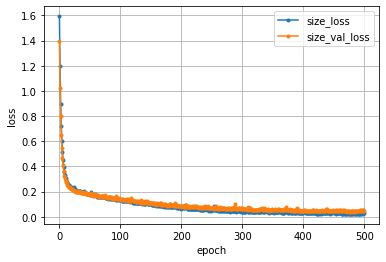

In [142]:
# 学習経過の可視化(大きさ)
size_loss     = size_history.history['loss']
size_val_loss = size_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

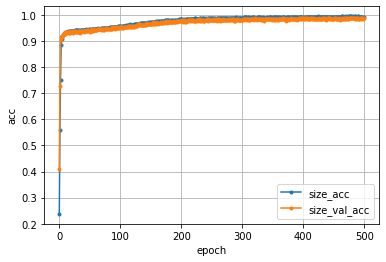

In [143]:
# 学習経過の可視化(大きさ)
size_acc     = size_history.history['accuracy']
size_val_acc = size_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [144]:
## 拡張前のデータの学習状況と比較

## CNN(大きさ)

### modelの作成
size_ne_model = Sequential()
### 畳み込み層
size_ne_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
size_ne_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
size_ne_model.add(Flatten())
### 全結合層
size_ne_model.add(Dense(6, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
size_ne_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [145]:
# 学習(大きさ)
epochs = 500
batch_size = 128
size_ne_history = size_ne_model.fit(X_ne_ss_train, size_Y_ne_ss_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_ne_ss_test, size_Y_ne_ss_test))

Epoch 1/500
50/50 [==============================] - 1s 10ms/step - loss: 1.6365 - accuracy: 0.2013 - val_loss: 1.3396 - val_accuracy: 0.5100
Epoch 2/500
50/50 [==============================] - 0s 7ms/step - loss: 1.2469 - accuracy: 0.6070 - val_loss: 0.9724 - val_accuracy: 0.7725
Epoch 3/500
50/50 [==============================] - 0s 7ms/step - loss: 0.9052 - accuracy: 0.7920 - val_loss: 0.7475 - val_accuracy: 0.8637
Epoch 4/500
50/50 [==============================] - 0s 7ms/step - loss: 0.7010 - accuracy: 0.8932 - val_loss: 0.6019 - val_accuracy: 0.9075
Epoch 5/500
50/50 [==============================] - 0s 7ms/step - loss: 0.5708 - accuracy: 0.9116 - val_loss: 0.5000 - val_accuracy: 0.9194
Epoch 6/500
50/50 [==============================] - 0s 7ms/step - loss: 0.4663 - accuracy: 0.9277 - val_loss: 0.4362 - val_accuracy: 0.9094
Epoch 7/500
50/50 [==============================] - 0s 7ms/step - loss: 0.4062 - accuracy: 0.9213 - val_loss: 0.3845 - val_accuracy: 0.9262
Epoch 8/500


In [146]:
# モデルの評価(大きさ)
size_ne_score = size_ne_model.evaluate(X_ans_data, size_Y_ans_data, verbose=1)
print('Test loss:', size_ne_score[0])
print('Test accuracy:', size_ne_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 0.0327 - accuracy: 0.9935
Test loss: 0.03274957090616226
Test accuracy: 0.9934846758842468


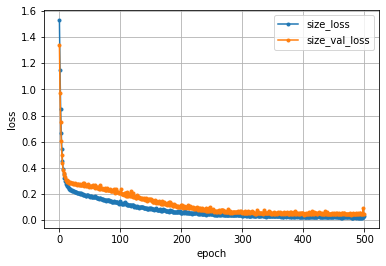

In [147]:
# 学習経過の可視化(大きさ)
size_loss     = size_ne_history.history['loss']
size_val_loss = size_ne_history.history['val_loss']

nb_epoch = len(size_loss)
plt.plot(range(nb_epoch), size_loss,     marker='.', label='size_loss')
plt.plot(range(nb_epoch), size_val_loss, marker='.', label='size_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

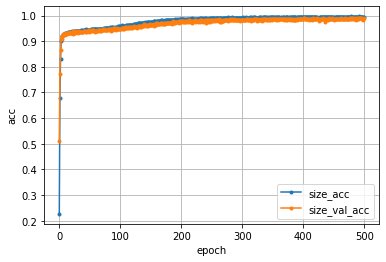

In [148]:
# 学習経過の可視化(大きさ)
size_acc     = size_ne_history.history['accuracy']
size_val_acc = size_ne_history.history['val_accuracy']

nb_epoch = len(size_acc)
plt.plot(range(nb_epoch), size_acc,     marker='.', label='size_acc')
plt.plot(range(nb_epoch), size_val_acc, marker='.', label='size_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [150]:
## CNN(位置)

### modelの作成
position_model = Sequential()
### 畳み込み層
position_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_model.add(Flatten())
### 全結合層
position_model.add(Dense(26, activation='softmax'))

### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [151]:
# 学習(位置)
epochs = 2000
batch_size = 128
position_history = position_model.fit(X_ss_train, position_Y_ss_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_ss_test, position_Y_ss_test))

Epoch 1/2000
50/50 [==============================] - 1s 11ms/step - loss: 3.1112 - accuracy: 0.1241 - val_loss: 2.7297 - val_accuracy: 0.2644
Epoch 2/2000
50/50 [==============================] - 0s 8ms/step - loss: 2.5864 - accuracy: 0.3182 - val_loss: 2.3569 - val_accuracy: 0.3075
Epoch 3/2000
50/50 [==============================] - 0s 8ms/step - loss: 2.2729 - accuracy: 0.3678 - val_loss: 2.1355 - val_accuracy: 0.3569
Epoch 4/2000
50/50 [==============================] - 0s 8ms/step - loss: 2.0909 - accuracy: 0.3911 - val_loss: 2.0106 - val_accuracy: 0.3894
Epoch 5/2000
50/50 [==============================] - 0s 7ms/step - loss: 1.9493 - accuracy: 0.4401 - val_loss: 1.8976 - val_accuracy: 0.4094
Epoch 6/2000
50/50 [==============================] - 0s 8ms/step - loss: 1.8411 - accuracy: 0.4510 - val_loss: 1.8047 - val_accuracy: 0.4263
Epoch 7/2000
50/50 [==============================] - 0s 8ms/step - loss: 1.7718 - accuracy: 0.4589 - val_loss: 1.7411 - val_accuracy: 0.4606
Epoch

In [152]:
# モデルの評価(位置)
position_score = position_model.evaluate(X_ans_data, position_Y_ans_data, verbose=1)
print('Test loss:', position_score[0])
print('Test accuracy:', position_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 0.5708 - accuracy: 0.8063
Test loss: 0.5707670450210571
Test accuracy: 0.8063178658485413


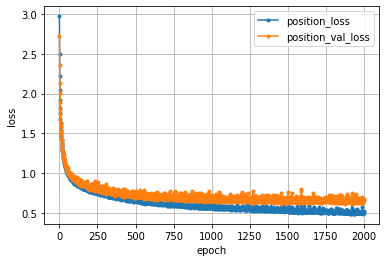

In [153]:
# 学習経過の可視化(位置)
position_loss     = position_history.history['loss']
position_val_loss = position_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

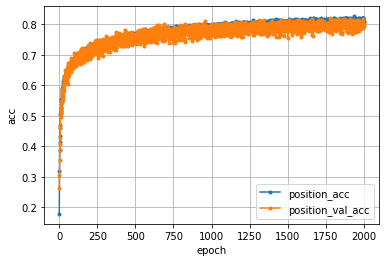

In [154]:
# 学習経過の可視化(位置)
position_acc     = position_history.history['accuracy']
position_val_acc = position_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

In [155]:
## CNN(位置)

### modelの作成
position_ne_model = Sequential()
### 畳み込み層
position_ne_model.add(Conv1D(32, 3, padding='same', activation='relu', input_shape=(50, 1)))
### プーリング層
position_ne_model.add(MaxPooling1D(2, padding='same'))
### Flatten層
position_ne_model.add(Flatten())
### 全結合層
position_ne_model.add(Dense(26, activation='softmax'))
### バッチ正規化
BatchNormalization()
### optimizer
adam = keras.optimizers.Adam()

###modelのコンパイル
position_ne_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

In [156]:
# 学習(位置)
epochs = 2000
batch_size = 128
position_ne_history = position_ne_model.fit(X_ne_ss_train, position_Y_ne_ss_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(X_ne_ss_test, position_Y_ne_ss_test))

Epoch 1/2000
50/50 [==============================] - 1s 11ms/step - loss: 3.1148 - accuracy: 0.1215 - val_loss: 2.7084 - val_accuracy: 0.2663
Epoch 2/2000
50/50 [==============================] - 0s 7ms/step - loss: 2.6160 - accuracy: 0.2769 - val_loss: 2.3563 - val_accuracy: 0.3475
Epoch 3/2000
50/50 [==============================] - 0s 7ms/step - loss: 2.2851 - accuracy: 0.3613 - val_loss: 2.1395 - val_accuracy: 0.3906
Epoch 4/2000
50/50 [==============================] - 0s 7ms/step - loss: 2.0986 - accuracy: 0.4070 - val_loss: 2.0038 - val_accuracy: 0.4256
Epoch 5/2000
50/50 [==============================] - 0s 7ms/step - loss: 1.9595 - accuracy: 0.4475 - val_loss: 1.8861 - val_accuracy: 0.4700
Epoch 6/2000
50/50 [==============================] - 0s 8ms/step - loss: 1.8509 - accuracy: 0.4698 - val_loss: 1.8067 - val_accuracy: 0.4494
Epoch 7/2000
50/50 [==============================] - 1s 12ms/step - loss: 1.8047 - accuracy: 0.4561 - val_loss: 1.7487 - val_accuracy: 0.4588
Epoc

In [157]:
# モデルの評価(位置)
position_ne_score = position_ne_model.evaluate(X_ans_data, position_Y_ans_data, verbose=1)
print('Test loss:', position_ne_score[0])
print('Test accuracy:', position_ne_score[1])

317/317 [==============================] - 0s 1ms/step - loss: 0.5027 - accuracy: 0.8250
Test loss: 0.5027187466621399
Test accuracy: 0.824975311756134


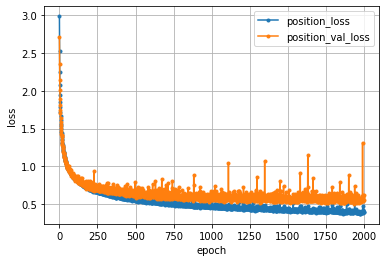

In [158]:
# 学習経過の可視化(位置)
position_loss     = position_ne_history.history['loss']
position_val_loss = position_ne_history.history['val_loss']

nb_epoch = len(position_loss)
plt.plot(range(nb_epoch), position_loss,     marker='.', label='position_loss')
plt.plot(range(nb_epoch), position_val_loss, marker='.', label='position_val_loss')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

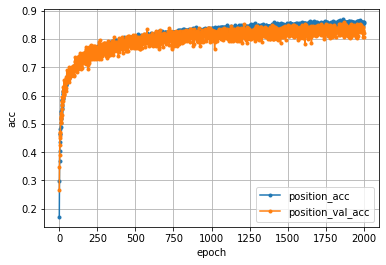

In [159]:
# 学習経過の可視化(位置)
position_acc     = position_ne_history.history['accuracy']
position_val_acc = position_ne_history.history['val_accuracy']

nb_epoch = len(position_acc)
plt.plot(range(nb_epoch), position_acc,     marker='.', label='position_acc')
plt.plot(range(nb_epoch), position_val_acc, marker='.', label='position_val_acc')
plt.legend(loc='best', fontsize=10)
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()